<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Probabilistic-Graphical-Models" data-toc-modified-id="Introduction-to-Probabilistic-Graphical-Models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Probabilistic Graphical Models</a></span></li><li><span><a href="#Practical-Session-2" data-toc-modified-id="Practical-Session-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Practical Session 2</a></span><ul class="toc-item"><li><span><a href="#GMM-EM" data-toc-modified-id="GMM-EM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>GMM-EM</a></span></li><li><span><a href="#Anfu-TANG" data-toc-modified-id="Anfu-TANG-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Anfu TANG</a></span></li></ul></li></ul></div>

## Introduction to Probabilistic Graphical Models
## Practical Session 2
### GMM-EM
### Anfu TANG


**Question 1**

As indicated in the question, to avoid 0/0, we calculate instead at first:

$$
\begin{equation}
\begin{aligned}
log\gamma_i(x) &= logl_i-log\sum\limits_{j=1}^{K}e^{l_j}\\
&=logl_i-logsumexp(\mathbf{l})
\end{aligned}
\end{equation}\tag{1}
$$

where $\mathbf{l}={l_1,l_2,...,,,l_K}$, 

and $logsumexp(\mathbf{l})=log\sum\limits_{i}e^{l_i}$.

By (1) we can use logsumexp trick, since $l_i$ is small. Besides,

$l_i = log \pi_i\mathcal{N}(x;\mu_i,\Sigma_i)$

$\mathcal{N}(x;\mu_i,\Sigma_i)=\frac{e^{-\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)}}{\sqrt{(2\pi)^k|\Sigma_i|}}$

where k is the dimension of vector x.

Thus

$log{l_i}=log{\pi_i}-\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)-\frac{k}{2}log(2\pi)-\frac{1}{2}log{|\Sigma_i|}\tag{2}$

In [1]:
import numpy as np

def logsumexp(v):
    v_max = np.max(v)
    v1 = v-v_max
    return v_max + np.log(np.sum(np.exp(v1)))

def compute_gamma(x,catogory,pi,mu,sigma):
    ##input:an observation x(vector)
    ##      parameters of K sub-gaussian distribution(list)
    #number of catogories
    K = len(pi)
    #dimension of observation
    k = len(x)
    #constant log(2*pi)
    constant = (k/2) * np.log(2*np.pi)
    #calculate all l_i
    L = np.zeros(K)
    for i in range(K):
        x_diff_mu = x-mu[i]
        L[i] = np.log(pi[i])-0.5*(x_diff_mu.dot(np.linalg.inv(sigma[i]))).dot(x_diff_mu.T) - constant \
        - 0.5 * np.log(np.linalg.det(sigma[i]))
    return np.exp(L[catogory] - logsumexp(L))

def compute_all_gamma(x,pi,mu,sigma):
    #calculate gamma variables for all classes
    K = len(pi)
    #dimension of observation
    k = len(x)
    #constant log(2*pi)
    constant = (k/2) * np.log(2*np.pi)
    #calculate all l_i
    L = np.zeros(K)
    for i in range(K):
        x_diff_mu = x-mu[i]
        L[i] = np.log(pi[i])-0.5*(x_diff_mu.dot(np.linalg.inv(sigma[i]))).dot(x_diff_mu.T) - constant \
        - 0.5 * np.log(np.linalg.det(sigma[i]))
    return np.exp(L - logsumexp(L))

**Question 2**

Given a GMM model 

$p(x_n)=\sum\limits_{i=1}^{K}\pi_i\mathcal{N}(x_n;\mu_i,\Sigma_i)$

for N observation $X={x_1,x_2,...,x_n}$

$p(X)=\prod\limits_{n=1}^{N} \sum\limits_{i=1}^{K}\pi_i\mathcal{N}(x_n;\mu_i,\Sigma_i)\tag{3}$

To maximize this probability, at first exert logarithm to both sides of (3), then calculate partial derivative of $p(X)$ w.r.t $\pi_i,\mu_i,\Sigma_i$, making them to 0 will give solutions.

$logp(X)=\sum\limits_{n=1}^{N}log \sum\limits_{i=1}^{K}p(x_n|\pi_i,\mu_i,\Sigma_i)\tag{4}$

- $\frac{\partial{logp(X)}}{\partial{\mu_i}}$

$$
\begin{equation}
\begin{aligned}
\frac{\partial{logp(X)}}{\partial{\mu_i}} &= \sum\limits_{n=1}^{N}\frac{1}{\sum\limits_{i=1}^{K}p(x_n|\pi_i,\mu_i,\Sigma_i)}\frac{\partial\sum\limits_{i=1}^{K}p(x_n|\pi_i,\mu_i,\Sigma_i)}{\partial\mu_k} \\
&= \sum\limits_{n=1}^{N}\frac{1}{\sum\limits_{i=1}^{K}\pi_i\mathcal{N}(x_n;\mu_i,\Sigma_i)}\frac{\partial\pi_i\mathcal{N}(x_n;\mu_i,\Sigma_i)}{\partial\mu_i}\\
&= \sum\limits_{n=1}^{N}\frac{1}{\sum\limits_{i=1}^{K}\pi_i\mathcal{N}(x_n;\mu_i,\Sigma_i)}\frac{\frac{\pi_ie^{-\frac{1}{2}(x_n-\mu_i)^T\Sigma_k^{-1}(x_n-\mu_i)}}{\sqrt{(2\pi)^k|\Sigma_i|}}}{\partial \mu_i} \\
&=\sum\limits_{n=1}^{N}\frac{\pi_i\mathcal{N}(x_n;\mu_i,\Sigma_i)}{\sum\limits_{i=1}^{K}\pi_i\mathcal{N}(x_n;\mu_i,\Sigma_i)}(-\Sigma_i^{-1}(x_n-\mu_i))\\
&=\sum\limits_{n=1}^{N}\gamma_i(x_n)\Sigma_i^{-1}(x_n-\mu_i)
\end{aligned}
\end{equation}\tag{5}
$$

Let $$\frac{\partial{logp(X)}}{\partial{\mu_i}}=0$$

we get $$\mu_i=\frac{\sum\limits_{n=1}^{N}\gamma_i(x_n)x_n}{\sum\limits_{n=1}^{N}\gamma_i(x_n)}\tag{6}$$

- $\frac{\partial{logp(X)}}{\partial{\Sigma_i}}$

Of the same, let

$$\frac{\partial{logp(X)}}{\partial{\Sigma_i}}=\sum\limits_{n=1}^{N}\gamma_i(x_n)((x_n-\mu_i)(x_n-\mu_i)^T-\Sigma_i)=0$$

Thus 

$\Sigma_i=\frac{\sum\limits_{n=1}^{N}\gamma_i(x_n)((x_n-\mu_i)(x_n-\mu_i)^T}{\sum\limits_{n=1}^{N}\gamma_i(x_n)}\tag{7}$

- $\frac{\partial{logp(X)}}{\partial{\pi_i}}$

Because $\sum\limits_{i=1}^{K}\pi_i=1$, we add a Lagrange multiplier.Let

$$\frac{\partial{[logp(X)+\lambda(\sum\limits_{i=1}^{K}\pi_i-1)]}}{\partial{\pi_i}}=\sum\limits_{n=1}^{N}\frac{\mathcal{N}(x_n;\mu_i,\Sigma_i)}{\sum\limits_{i=1}^{K}\pi_i\mathcal{N}(x_n;\mu_i,\Sigma_i)}+\lambda=0$$

To calculate the value of $\lambda$, we multiply $\pi_i$ to both sides of the equation:

$\sum\limits_{n=1}^{N}\gamma_i(x_n)+\lambda\gamma_i(x_n)=0$

add these $K$ equations, we have:

$\lambda+\sum\limits_{n=1}^{N}\sum\limits_{i=1}^{K}\gamma_i(x_n)=0 \rightarrow \lambda=-N$

Thus

$\pi_i=\frac{\sum\limits_{n=1}^{N}\gamma_i(x_n)}{N}$

In [2]:
def E_step(obs,pi,mu,sigma):
    '''
    input:
    obs - N*k matrix, each row represents a k-dimension observation
    pi,mu,sigma - parameters in GMM(format:list, e.g. pi[k] indicates pi for k-th class)
    
    output:
    membership weights matrix(N*K)
    '''
    #calculate all gamma variable
    N, k = obs.shape[0],obs.shape[1]
    #number of categories
    K = len(pi)
    MW = np.zeros((N,K))
    for i in range(N):
        MW[i,:] = compute_all_gamma(obs[i,:],pi,mu,sigma)
    return MW    

def M_step(obs,membership_weight):
    '''
    input:
    obs - N*k observations
    membership_weight - N*K weights, mw[i,j] represents the probability of i-th observation belongs to j-th class
    
    output:
    updated parameters pi,mu,sigma(list)
    '''
    N, k = obs.shape[0],obs.shape[1]
    K = membership_weight.shape[1]
    pi_updated = list(np.sum(membership_weight,axis=0))
    mu_updated = []
    for i in range(K):
        mu_updated.append((np.sum(np.multiply(obs.T,membership_weight[:,i]).T,axis=0))/(pi_updated[i]))
    sigma_updated = []
    for i in range(K):
        #k*k covariance matrix
        temp_sigma = np.zeros((k,k))
        for j in range(N):
            sigma_i = (obs[j,:]-mu_updated[i]).reshape((2,1))
            temp_sigma = temp_sigma + membership_weight[j,i]*sigma_i.dot(sigma_i.T)
        sigma_updated.append(temp_sigma /(pi_updated[i]))
    pi_updated = list(np.sum(membership_weight,axis=0)/N)
    return pi_updated, mu_updated, sigma_updated

def EM(iterations,observation,pi_init,mu_init,sigma_init):
    '''
    input:
    iterations - number of iterations
    pi_init, mu_init, sigma_init - initial parameters
    observations - observation matrix
    
    output:
    updated parameters
    '''
    
    pi_temp, mu_temp, sigma_temp = pi_init, mu_init, sigma_init
    for i in range(iterations):
        mw = E_step(observation,pi_temp,mu_temp,sigma_temp)
        pi_temp, mu_temp, sigma_temp = M_step(observation,mw)
    return pi_temp, mu_temp, sigma_temp

**Question 3**

In [3]:
def Generate_dateset(K,N,pi,mu,sigma):
    #data dimension of each point
    d = len(mu[0])
    #date matrix to generate
    dataset = np.zeros((N,d))
    labels = []
    #generate point by point
    for i in range(N):
        n_class = int(np.random.choice(a=np.linspace(0,K-1,K,dtype="int"),size=1,p=np.array(pi)))
        dataset[i,:] = np.random.multivariate_normal(mean=mu[n_class],cov=sigma[n_class])   
        labels.append(n_class)
    return dataset,labels

#parameters
K = 3
N = 1000
pi1, pi2, pi3 = 0.3,0.2,0.5
mu1, mu2, mu3 = np.array([0,0]),np.array([1,2]),np.array([2,0])
sigma1 = np.array([1.00,0.25,0.25,0.50]).reshape((2,2))
sigma2 = np.array([0.50,0.25,0.25,0.50]).reshape((2,2)) 
sigma3 = np.array([0.50,0.25,0.25,1]).reshape((2,2))
Pi = [pi1, pi2, pi3]
Mu = [mu1,mu2,mu3]
Sigma = [sigma1,sigma2,sigma3]

**1.Generate a dataset by GMM model & Visualize**

In [4]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib import cm

#generation
X,L= Generate_dateset(K,N,Pi,Mu,Sigma)
#visulization
colors = ["red","orange","blue"]
color = [colors[item] for item in L]
plt.scatter(x=X[:,0],y=X[:,1],c=color)

In [5]:
from sklearn.datasets import make_spd_matrix

def initialize(dim,n_class):
    #input dimension
    pi_init = np.random.rand(n_class)
    pi_init /= np.sum(pi_init)
    mu_init = np.random.rand(n_class,dim)
    sigma_init = []
    for i in range(n_class):
        sigma_init.append(make_spd_matrix(dim))
    return pi_init,mu_init,sigma_init

**(a)intermediate contours of estimated Gaussians**

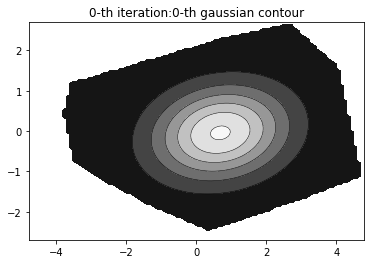

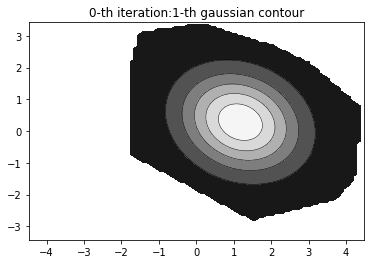

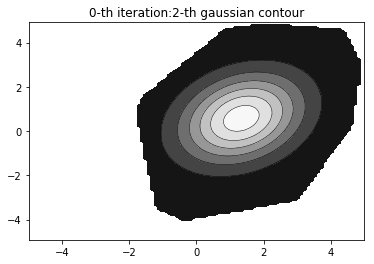

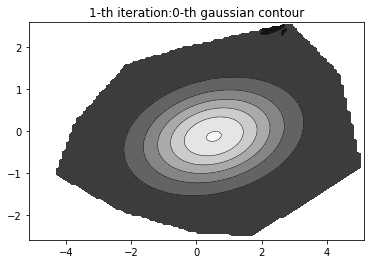

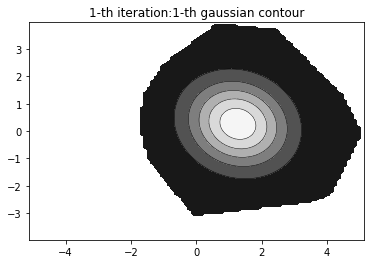

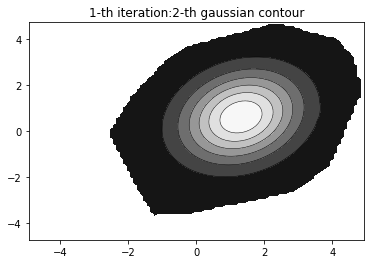

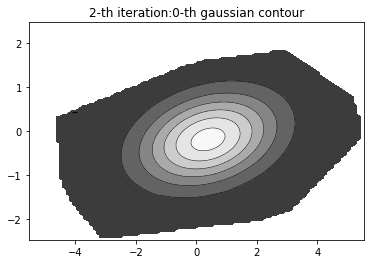

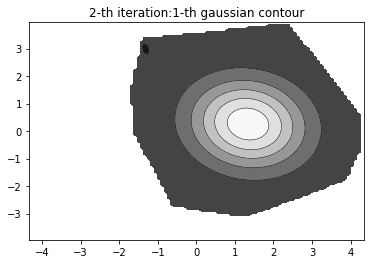

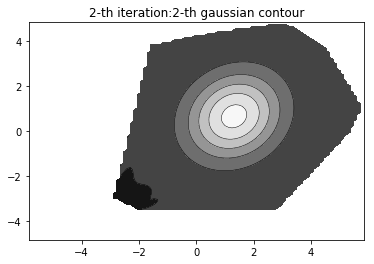

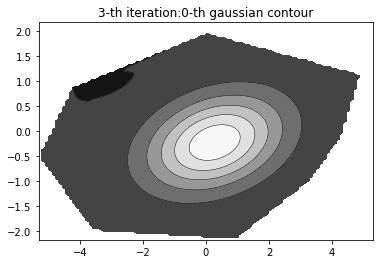

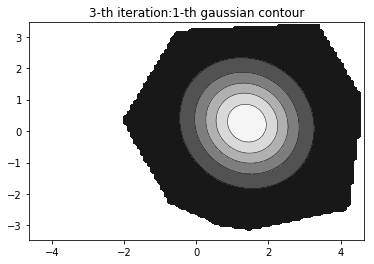

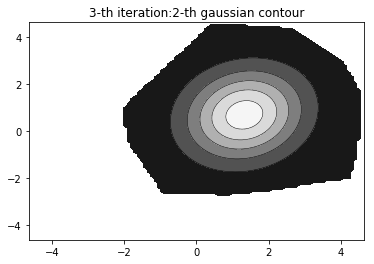

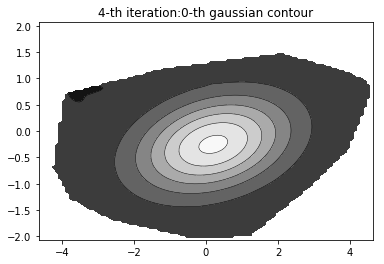

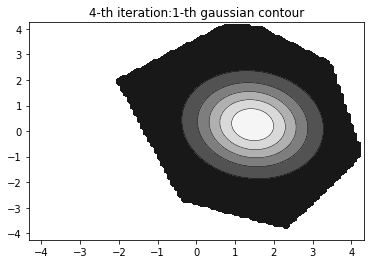

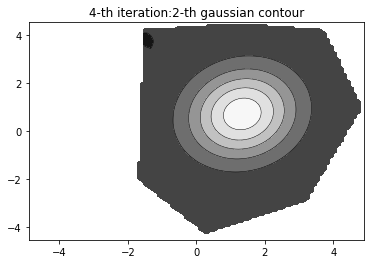

In [12]:
from scipy.stats import multivariate_normal

def plot_gaussian_contour(mu,sigma,ite):
    #number of points for plotting contours
    num = 1000
    K = len(mu)
    for j in range(K):
        #print(sigma[i])
        pts = np.random.multivariate_normal(mu[j],sigma[j],num)
        x = pts[:,0]
        y = pts[:,1]
        x_lim = np.max(abs(x))
        y_lim = np.max(abs(y))
        var = multivariate_normal(mean=mu[j],cov=sigma[j])
        z = var.pdf(pts)
        #grid points
        xi = np.linspace(-x_lim,x_lim,100)
        yi = np.linspace(-y_lim,y_lim,100)
        # grid the data.
        zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
        # contour the gridded data, plotting dots at the randomly spaced data points.
        CS = plt.contour(xi,yi,zi,6,linewidths=0.5,colors='k')
        CS = plt.contourf(xi,yi,zi,6,cmap=cm.Greys_r)
        plt.xlim(-x_lim,x_lim)
        plt.ylim(-y_lim,y_lim)
        plt.title('%d-th iteration:%d-th gaussian contour'%(ite,j))
        plt.show()

def EM_contour(iterations,observation,pi_init,mu_init,sigma_init):
    pi_temp, mu_temp, sigma_temp = pi_init, mu_init, sigma_init
    for i in range(iterations):
        mw = E_step(observation,pi_temp,mu_temp,sigma_temp)
        pi_temp, mu_temp, sigma_temp = M_step(observation,mw)
        plot_gaussian_contour(mu_temp,sigma_temp,i)
    return 

#randomly initialized parameters
Pi_init, Mu_init, Sigma_init = initialize(2,K)
num_iter = 5
EM_contour(num_iter,X,Pi_init,Mu_init,Sigma_init)

**(b)log-likelihood**

In [7]:
def compute_loglikelihood(obs,n_class,pi,mu,sigma):
    loglikelihood = np.zeros((n_class,len(obs)))
    for j in range(n_class):
        var = multivariate_normal(mean=mu[j],cov=sigma[j])
        loglikelihood[j,:] = pi[j]*var.pdf(obs)
    loglikelihood = np.log(np.sum(loglikelihood,axis=0))
    return np.sum(loglikelihood)

def EM_loglikelihood(iterations,observation,pi_init,mu_init,sigma_init):
    pi_temp, mu_temp, sigma_temp = pi_init, mu_init, sigma_init
    K = len(pi_init)
    iter_loglikelihood = []
    for i in range(iterations):
        mw = E_step(observation,pi_temp,mu_temp,sigma_temp)
        pi_temp, mu_temp, sigma_temp = M_step(observation,mw)
        iter_loglikelihood.append(compute_loglikelihood(observation,K,pi_temp,mu_temp,sigma_temp))
    #draw the curve
    plt.figure(figsize=(6,3))
    plt.plot(np.linspace(1,iterations,iterations),iter_loglikelihood,"b")
    plt.xlabel("n_iteration")
    plt.ylabel("estimatede log_likelihood")
    plt.show()
    return 

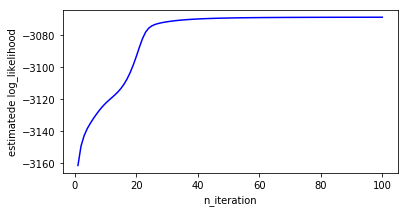

In [8]:
num_iter = 100
EM_loglikelihood(num_iter,X,Pi_init,Mu_init,Sigma_init)

**Comment**

It is evident that the loglikelihood of our estimated GMM model increases with the number of iterations, which means that estimated parameters explain the observation better. Besides, the loglikelihood converges to a certain value after nearly 40 iterations. The curve is steep at the beginning of iterations, that's the result of random initialization.

If we check final parameters given by EM algorithm, our program do give approximate estimation.(order might be different)

In [9]:
pi_estimate, mu_estimate, sigma_estimate = EM(50,X,Pi_init,Mu_init,Sigma_init)

print("real pi & estimated pi")
print(Pi)
print(pi_estimate)
print("---")
print("real mu & estimated mu")
print(Mu)
print(mu_estimate)
print("---")
print("real sigma & estimated sigma")
print(Sigma)
print(sigma_estimate)

real pi & estimated pi
[0.3, 0.2, 0.5]
[0.21248242580302285, 0.2679823387997936, 0.5195352353971826]
---
real mu & estimated mu
[array([0, 0]), array([1, 2]), array([2, 0])]
[array([0.94748285, 1.97512427]), array([-0.14975543, -0.13357097]), array([ 1.98414196, -0.00311994])]
---
real sigma & estimated sigma
[array([[1.  , 0.25],
       [0.25, 0.5 ]]), array([[0.5 , 0.25],
       [0.25, 0.5 ]]), array([[0.5 , 0.25],
       [0.25, 1.  ]])]
[array([[0.4724118 , 0.22232335],
       [0.22232335, 0.49544122]]), array([[0.90020472, 0.19773635],
       [0.19773635, 0.47561764]]), array([[0.52227399, 0.27634725],
       [0.27634725, 0.98849333]])]


**(c)test different initializations**

Based on results before, test with 100 iterations.

0-th initialization
[0.41704639 0.54325262 0.03970099]
[[0.43465844 0.25678922]
 [0.27202012 0.80666636]
 [0.8336279  0.56300656]]
[array([[2.71839183, 0.26439335],
       [0.26439335, 0.77640986]]), array([[2.56086637, 0.09099351],
       [0.09099351, 0.44913068]]), array([[ 2.51951514, -0.39816475],
       [-0.39816475,  0.65997556]])]


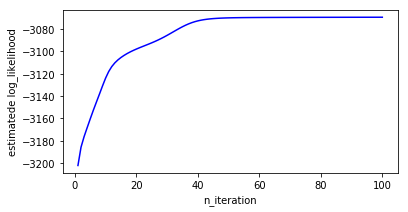

1-th initialization
[0.70176348 0.16956989 0.12866663]
[[0.25832687 0.62767923]
 [0.47461142 0.68178889]
 [0.8393266  0.15513692]]
[array([[2.43234508, 0.46844077],
       [0.46844077, 0.61364944]]), array([[2.62985495, 0.3804033 ],
       [0.3804033 , 0.74391629]]), array([[2.65098053, 0.08236933],
       [0.08236933, 0.63711274]])]


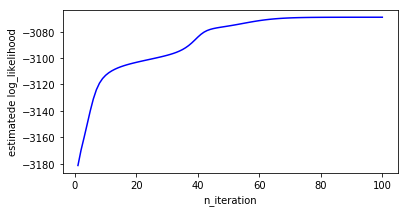

2-th initialization
[0.22263838 0.46056579 0.31679583]
[[0.23778234 0.53917706]
 [0.90050479 0.88173265]
 [0.46393095 0.86306848]]
[array([[1.93202704, 0.84604457],
       [0.84604457, 0.71625619]]), array([[ 2.07942866, -0.23183841],
       [-0.23183841,  0.13163279]]), array([[2.63000241, 0.68186163],
       [0.68186163, 1.1617799 ]])]


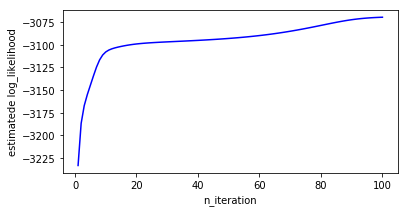

3-th initialization
[0.07774443 0.22104417 0.7012114 ]
[[0.2846186  0.62674524]
 [0.2843067  0.87365982]
 [0.79317153 0.99109965]]
[array([[1.99718427, 0.96891886],
       [0.96891886, 1.34649885]]), array([[ 2.67932883, -0.44546739],
       [-0.44546739,  0.87902895]]), array([[2.36699506, 0.58994653],
       [0.58994653, 0.71013353]])]


In [ ]:
num_iter = 100
for i in range(10):
    Pi_init, Mu_init, Sigma_init = initialize(2,K)
    print("%d-th initialization"%i)
    print(Pi_init)
    print(Mu_init)
    print(Sigma_init)
    EM_loglikelihood(num_iter,X,Pi_init,Mu_init,Sigma_init)

Try a more precise initialization

given initialization


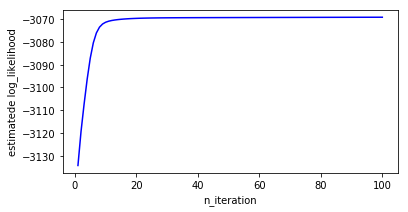

In [11]:
sigma1 += make_spd_matrix(2)
sigma2 += make_spd_matrix(2)
sigma3 += make_spd_matrix(2)
Pi = [pi1, pi2, pi3] + np.random.rand(3)
Pi_init = Pi/sum(Pi)
Mu_init = Mu + np.random.rand(3,2) 
Sigma_init = [sigma1,sigma2,sigma3]
print("given initialization")
EM_loglikelihood(num_iter,X,Pi_init,Mu_init,Sigma_init)

For different initial values, our program is stable enough for random initialization, but we can find that for different initial values, convergent value is different, and convergence speed is different too, which means EM algorithm finds only local minimum.

When we try a given initial value which is more close to real parameters, we can reach a faster convergence within 20 iterations.  